# `CREDIT CARD FRAUD DETECTION CAPSTONE PROJECT` 
## -          `BY R.MADHAVAN AND JAYASREE MANGALAGIRI`
    

### Importing the basic data reading ,manipulation and plotting libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Using the below piece of code while working on colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing the data 

In [2]:
data = pd.read_csv('/Users/madhavan/Desktop/new /capstone/creditcard.csv')

### Looking at the shape,head and the info to get basic understanding about it

In [3]:
data.shape

(284807, 31)

#### We can verify that we have more then 2.5 lakh records

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
round(data.describe(),3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


#### Also, we observe that there are 28 Pca transformed variables , a time variable, Amount variable and our traget variable(class)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for null values in the data (if any)

In [7]:
data.isnull().sum().sum()

0

### `After inspection we can observe that the data doesnot contain any missing values.Thus we can proceed towards EDA`

### Exploratory Data Analysis and Data Standardisation

In [8]:
p_comp = data.filter(like = 'V')

In [9]:
other = data.loc[:,data.columns.str[0] != 'V']

In [10]:
other.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


### lets take a look at time and amount feature

<AxesSubplot:>

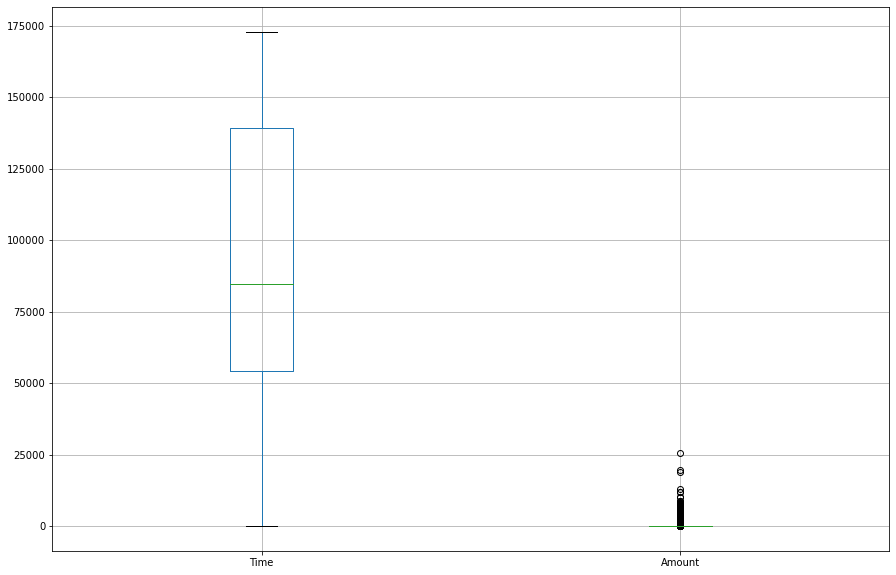

In [11]:
other.iloc[:,:-1].boxplot(figsize = (15,10))

### "Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset'" 

In [12]:
other['Time'].head(10)

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
6    4.0
7    7.0
8    7.0
9    9.0
Name: Time, dtype: float64

### Lets create a new derived feature. I.e No of transactions at each particular time step and lets use it in our model

In [13]:
other['No_of_trans_time'] = other['Time'].map(dict(other['Time'].value_counts()))
data['No_of_trans_time'] = data['Time'].map(dict(data['Time'].value_counts()))

/Users/madhavan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## `As time variable is unneccesary lets consider to drop it`

In [14]:
del other['Time']
del data['Time']

### Checking the spread of the Amount feature

/Users/madhavan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Amount'>

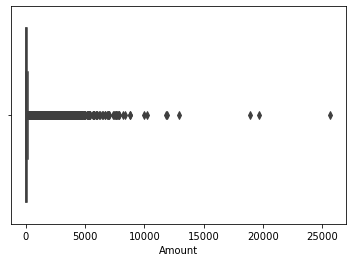

In [15]:
sns.boxplot(other['Amount'])

### We can see that it is very skewed. To effectively visualize it , lets convert the values in to log scale. Adding a epsilon value to it , so that zero values dont get converted to negative infinity 

/Users/madhavan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Amount'>

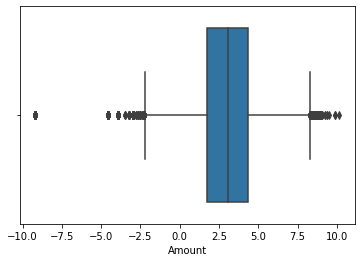

In [16]:
epsilon = 0.0001
sns.boxplot(np.log(other['Amount'] + epsilon))

### Lets remove the far away datapoint

In [17]:
other['Amount'] = np.log(other['Amount'] + epsilon)
other = other[other['Amount'] > -7.5]


/Users/madhavan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### LETS CHECK IF THERE IS ANY SIGNIFICANT DIFFERENCE IN THE DISTRIBUTION OF FRAUDSTERS AND NON FRAUDSTERS.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

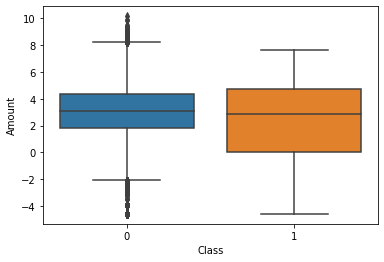

In [18]:
sns.boxplot(y = 'Amount' , x = 'Class' , data = other)

### Lets visualize the spread of all the principal components to see how much the data is skewed

<AxesSubplot:>

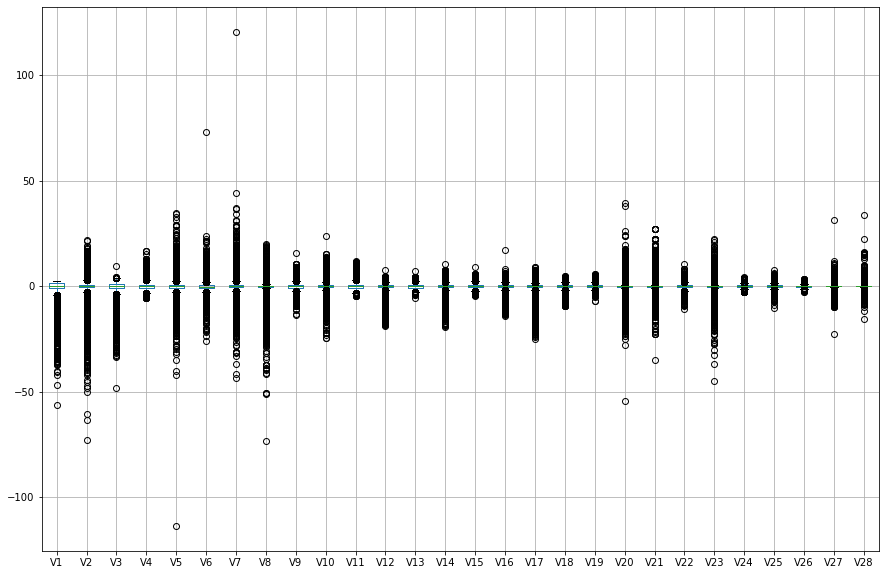

In [19]:
p_comp.boxplot(figsize = (15,10))

## `We can clearly see that the data is skewed. Lets also check the imbalance % of the data`

In [24]:
round(data['Class'].value_counts(normalize = True),3)

0    0.998
1    0.002
Name: Class, dtype: float64

# `Remember that we are working on fraud detection problem. From business perspective, a fraudster could also be someone who shows different behaviour from the rest of the population. As we have outliers in the Principal Components, these outliers could also represent the minority group (fraudsters)`

## Let us approach the problem as a anomoly detection problem for now and lets use isolation forest algorithm (unsupervised ) to build our first baseline model

# `Baseline __ Model - 1 __ Isolation Forest`

### Lets check the parameters of Isolation Forest

In [305]:
from sklearn.ensemble import IsolationForest

IsolationForest().get_params()

{'behaviour': 'deprecated',
 'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### n-estimators and max_features are the two hyperparameters we need to tune

### `Also as we are starting our model building process .Thus,lets import the necessary functions and evaluation metrics`

In [306]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV ,StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer, roc_auc_score , roc_curve, recall_score , precision_score
import scipy as sp

### Lets split our independent and dependent variables. Also, note that we have not yet transformed our dataset though it is skewed, because Isolation forest is non-parametric tree based model which doesnot have any assumptions about the distribution of the population and also outliers is good for working on a anomoly detection problem

In [307]:
y = data['Class']
X = data[data.columns.difference(['Class'])]

In [308]:
iso = IsolationForest() #defining the model class

#choosing the hyperparamters
param_grid = {'n_estimators': range(10, 150, 50), "max_features": range(5, len(X.columns), 5)} 

#Defining a scorer 'roc-auc' for the model
def scorer(iso, X, y):
    y_score = - iso.decision_function(X)
    score = roc_auc_score(y, y_score) * 100.
    return score

# DUE TO THE PRESENCE OF CLASS IMBALANCE AND LAKHS OF RECORDS LETS USE STRATIFIED SHUFFLE SPLIT
sss = StratifiedShuffleSplit(n_splits = 3,random_state= 1)

#GrifSearch
grid = GridSearchCV(iso, param_grid, cv= sss, n_jobs = -1, scoring = scorer)

grid.fit(X, y)

print("Grid scores on validation set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print("Best parameters set found on validation set:")
print(grid.best_params_)
print("ROC AUC of the best estimator: ")
print(grid.best_score_)

Grid scores on validation set:
95.140 (+/-1.995) for {'max_features': 5, 'n_estimators': 10}
94.838 (+/-4.432) for {'max_features': 5, 'n_estimators': 60}
95.333 (+/-4.237) for {'max_features': 5, 'n_estimators': 110}
93.392 (+/-7.953) for {'max_features': 10, 'n_estimators': 10}
95.719 (+/-3.393) for {'max_features': 10, 'n_estimators': 60}
95.181 (+/-3.127) for {'max_features': 10, 'n_estimators': 110}
93.997 (+/-3.131) for {'max_features': 15, 'n_estimators': 10}
95.375 (+/-3.700) for {'max_features': 15, 'n_estimators': 60}
95.216 (+/-3.673) for {'max_features': 15, 'n_estimators': 110}
92.428 (+/-7.497) for {'max_features': 20, 'n_estimators': 10}
96.018 (+/-3.657) for {'max_features': 20, 'n_estimators': 60}
95.271 (+/-2.879) for {'max_features': 20, 'n_estimators': 110}
93.272 (+/-3.714) for {'max_features': 25, 'n_estimators': 10}
95.254 (+/-2.805) for {'max_features': 25, 'n_estimators': 60}
95.309 (+/-3.609) for {'max_features': 25, 'n_estimators': 110}
Best parameters set fo

### Lets create the model using best params

In [309]:
iso = IsolationForest(max_features = 5, n_estimators = 60)
iso.fit(X,y)

IsolationForest(max_features=5, n_estimators=60)

### Lets plot the roc curve and also check the auc of the dataset as a whole

In [310]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None



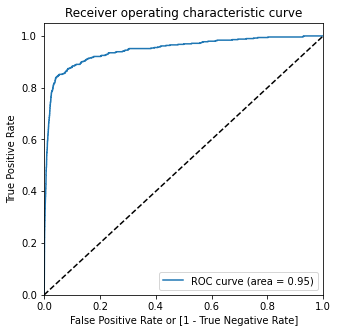

In [311]:
draw_roc(y,- iso.decision_function(X))

### We have a decent Auc_score (i.e 0.95) . But, also one of the goal of the project is to have the best Auc. Even 0.01 increase in Auc will result in saving millions of funds.Lets keep this as a baseline and try to further reconstruct better models

## LETS PROCEED TO SUPERVISED MACHINE LEARNING. LETS USE LOGISTIC REGRESSION AND KNN AS BASELINE MODELS TOO.  BUT, LINEAR MODELS LIKE LOGISTIC REGRESSION HAS THE ASSUMPTION THAT THE DATA SHOULD BE NORMALLY DISTRIBUTED. ALSO, THE PRESENCE OF OUTLIERS CREATES A DRASTIC IMPACT ON MODEL PERFORMANCE AND OLS ASSUMPTIONS WILL NOT BE MET. THUS, `LETS FIRST DEAL WITH OUTLIERS AND SKEWNESS`

### The below loop is to check how much % of information we lose in each column if we consider to remove outliers.

In [312]:
from copy import deepcopy
frame = deepcopy(data)
for col in data.columns.difference(['Class']):
    iqr =  frame[col].quantile(0.7500) - frame[col].quantile(0.2500)
    lower = frame[col].quantile(0.25) - (1.5 * iqr)
    upper = frame[col].quantile(0.75) + (1.5 * iqr)
    frame[col] = frame[col].map(lambda x:np.nan if x < lower or x > upper else x)
    
round(frame.isnull().mean() * 100,2)
    
    
    

V1                   2.48
V2                   4.75
V3                   1.18
V4                   3.91
V5                   4.32
V6                   8.06
V7                   3.14
V8                   8.47
V9                   2.91
V10                  3.33
V11                  0.27
V12                  5.39
V13                  1.18
V14                  4.97
V15                  1.02
V16                  2.87
V17                  2.61
V18                  2.64
V19                  3.58
V20                  9.75
V21                  5.09
V22                  0.46
V23                  6.51
V24                  1.68
V25                  1.88
V26                  1.96
V27                 13.75
V28                 10.65
Amount              11.20
Class                0.00
No_of_trans_time     1.42
dtype: float64

In [313]:
len(frame.dropna())/len(frame)

0.5075823276815528

### We can see that if we remove all the outliers in the data and have a cleaned dataframe , we will lose almost half of the data. Also, skewed features like Amount cannot be dropped because it contributes a lot to the Fraud Prediction. 

In [314]:
frame.dropna()['Class'].value_counts()

0    144548
1        15
Name: Class, dtype: int64

## We lose almost 90% of the fraud class datapoints when we remove outliers. So, this is not the best option. `LETS HANDLE THE SKEWNESS BY USING POWER TRANSFORMER LIBRARY OF SKLEARN`

## TRAIN AND TEST SPLIT (STRATIFIED)

In [315]:
X_train,X_test,y_train , y_test = train_test_split(X,y,stratify = y,random_state = 1)

In [316]:
y_train.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### TRAIN AND TEST REPRESENTING EQUAL % OF BOTH THE CLASSES

In [317]:
y_test.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Power Transformation

In [318]:
from sklearn.preprocessing import PowerTransformer  #Import the respective package
import copy

pt = PowerTransformer() # initialize the class

#CREATE A COPY OF X-TRAIN AND X-TEST
X_tr_c = copy.deepcopy(X_train) 
X_te_c = copy.deepcopy(X_test)


#FIT AND TRANSFORM THE DATA USING POWER TRANSFORMER
# By default it uses yeo-johnson power transformation which can handle NEGATIVE values along with scaling
X_tr_c[X_tr_c.columns] = pt.fit_transform(X_tr_c)
X_te_c[X_te_c.columns] = pt.transform(X_te_c) 



### Lets check the SPREAD OF THE TRANSFORMED DATASET

<AxesSubplot:>

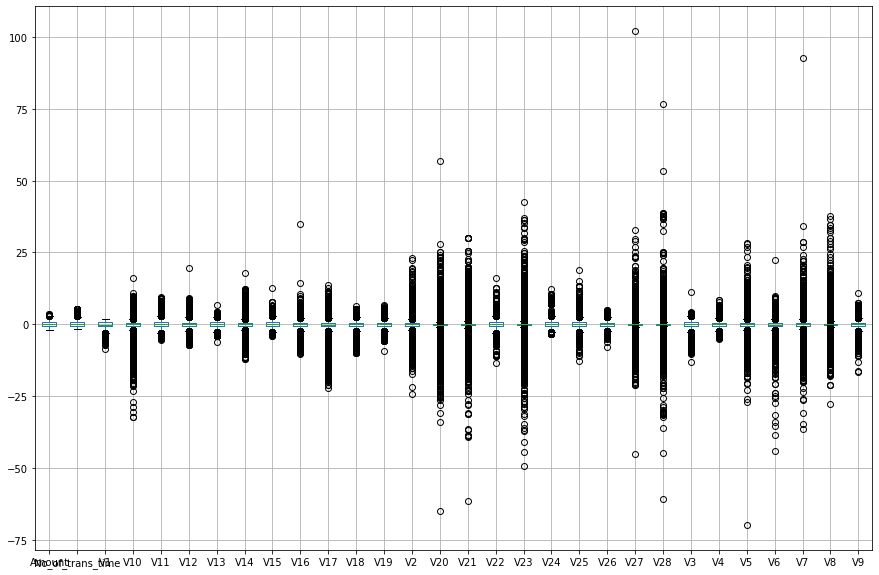

In [319]:
X_tr_c.boxplot(figsize = (15,10))

In [320]:
round(X_tr_c.describe(),2)

,Amount,No_of_trans_time,V1,V10,V11,V12,V13,V14,V15,V16,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
count,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,...,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00,213605.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.01,-1.64,-8.53,-32.40,-5.42,-7.22,-6.03,-12.25,-4.17,-10.33,...,-7.77,-45.20,-60.76,-13.10,-5.01,-69.92,-44.10,-36.37,-27.68,-16.44
25%,-0.76,-0.59,-0.72,-0.48,-0.73,-0.59,-0.65,-0.52,-0.67,-0.60,...,-0.65,-0.19,-0.15,-0.71,-0.57,-0.51,-0.56,-0.44,-0.27,-0.56
50%,0.03,0.13,-0.25,-0.04,0.01,-0.02,-0.00,-0.03,-0.00,-0.00,...,-0.02,-0.01,0.05,-0.03,0.06,-0.05,-0.11,0.04,-0.06,0.01
75%,0.75,0.69,0.74,0.46,0.75,0.61,0.67,0.49,0.69,0.57,...,0.58,0.22,0.25,0.67,0.58,0.43,0.42,0.46,0.25,0.58
max,3.67,5.30,1.87,16.23,9.48,19.61,6.86,17.68,12.75,34.85,...,4.93,102.08,76.63,11.39,8.49,28.45,22.30,92.61,37.66,10.73


## If we look at the transformed dataset closely we have a mean 0 and Std of 1 for all the variables now. BUT, STILL THERE ARE MANY OUTLIERS WE NEED TO HANDLE. WE HAVE NO OTHER OPTION LEFT BUT TO DROP THOSE.

### Lets run a loop again to check how much % of outliers are now present in each column , on the transformed dataset.

In [321]:
frame2 = copy.deepcopy(X_tr_c)
frame3 = copy.deepcopy(X_te_c)
for col in frame2.columns:
    iqr =  frame2[col].quantile(0.7500) - frame2[col].quantile(0.2500)
    lower = frame2[col].quantile(0.25) - (1.5 * iqr)
    upper = frame2[col].quantile(0.75) + (1.5 * iqr)
    frame2[col] = frame2[col].map(lambda x:np.nan if x < lower or x > upper else x)
    frame3[col] = frame3[col].map(lambda x:np.nan if x < lower or x > upper else x)
    
    
round(frame2.isnull().mean() * 100,2).sort_values(ascending = False)

V27                 13.79
V28                 10.61
V20                  9.80
V8                   9.13
V6                   7.07
V23                  6.50
V14                  5.17
V21                  5.05
V2                   4.57
V5                   4.52
V4                   3.79
V19                  3.66
V10                  3.49
V7                   3.16
V9                   3.03
V17                  3.01
V18                  2.72
V16                  2.60
V12                  1.97
V25                  1.78
V26                  1.40
V13                  1.15
V3                   0.76
V15                  0.70
V22                  0.45
V1                   0.45
No_of_trans_time     0.36
V11                  0.26
V24                  0.15
Amount               0.01
dtype: float64

### We can now check that , there are less % of outliers in most of the columns after transformation compared with before transformation

In [322]:
frame2 = frame2.drop(['V27','V28','V20','V8'], axis = 1)
frame2 = frame2.dropna()

#Applying the same on the test set too with the logic that logistic regression DOESNOT GUARANTEE EXTRAPOLATION
frame3 = frame3.drop(['V27','V28','V20','V8'], axis = 1) 
frame3 = frame3.dropna()


# We see even if we drop the the columns with high outliers and remove outliers from other columns , still we lose lot of information. Only 20 samples of class 1 is left in train set which will not be enough to understand the relationship in the data. Thus, lets consider using our initial transformed dataset to build a logistic regression model

In [323]:
pd.concat([frame2,y_train],axis = 1).dropna()['Class'].value_counts()

0    140573
1        20
Name: Class, dtype: int64

In [324]:
pd.concat([frame3,y_test],axis = 1).dropna()['Class'].value_counts()

0    47120
1        4
Name: Class, dtype: int64

# `Baseline __ Model - 2 __ Logistic Regression`

### Lets do hyperparameter tuning using RFE to pick the top n features

In [325]:
from sklearn.feature_selection import RFE
cv = StratifiedShuffleSplit(n_splits= 3 , random_state=1)
hyper_params = [{'n_features_to_select': range(2,len(X_train.columns),2)}]

In [ ]:
#Logistic
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_tr_c,y_train )
rfe = RFE(lr)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True , n_jobs= -1)      
model_cv.fit(X_tr_c,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  7.9min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbf

In [ ]:
model_cv.best_params_

{'n_features_to_select': 12}

### n_features as 12 gives the highest cross validation score. Lets build a model with top 12 features using Rfe

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe1 = RFE(lr,12)
rfe1.fit(X_tr_c,y_train)
col_1 = X_tr_c.columns[rfe1.support_]

lr1 = LogisticRegression()
lr1.fit(X_tr_c[col_1],y_train )

/Users/madhavan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


LogisticRegression()

## Lets plot the Roc-curve

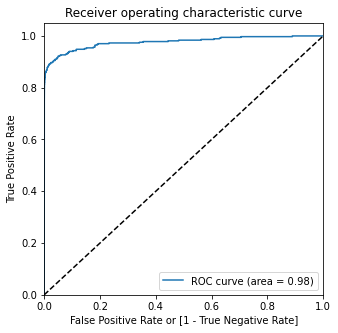

In [59]:
draw_roc(y_train,lr1.predict_proba(X_tr_c[col_1])[:,1])

### We have made significant improvement in the auc from 0.95 to 0.98. But, lets check tthe variance of the model using cross-validation. If each split has a different cv auc score that clearly means that it is HIGH VARIANCE AND HIGH BIAS MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
cv = StratifiedShuffleSplit(n_splits= 3 , random_state=1)
cross_val_score(lr1,X = X_tr_c[col_1], y = y_train , cv = cv, scoring = 'roc_auc')

array([0.98775013, 0.96956481, 0.96741142])

### We can see that once we have a 0.98 auc and on the other two occasions we have 0.96. So, this is a clue that our model may overfit on unseen data .NOTE THAT WE ARE NOT ALLOWED TO USE THE TEST DATASET TO MAKE CONCLUSIONS ON OUR MODEL PERFORMANCE. WE ONLY EVALUATE ON THE UNSEEN DATA ONCE WE CHOOSE THE BEST MODEL

### This also provides us the clue the overfitting condtion may be due to the outliers present in the data

# `Baseline __ Model - 3 __ KNN`

### Hyperparameter tuning on KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = range(5, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr_c, y_train, cv= cv, scoring= 'accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Choosing the best params and building the model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
f_knn = KNeighborsClassifier(n_neighbors= 10)

f_knn.fit(X_tr_c,y_train)

KNeighborsClassifier(n_neighbors=10)

### Knn doesnot output probabilities. So, lets check the auc score

In [43]:
roc_auc_score( y_train, f_knn.predict(X_tr_c) )

0.8563216672891559

# The isolation forest has 0.95 auc, Logistic regression has 0.98 auc and Knn as 0.85 auc. Also, we have seen due to the presence of outliers the OLS estimators may have a huge impact. This creates unstability when predicted on the Test Data. Also, if the real life data contains many more outliers even after transformation ,a linear model like Logistic Regression may not give accurate predictions.  

# `Thus afer considering these things and after observing the presence of outliers in the data, the following decisions were taken`

### a) Tree based algorithms doesnot require data to be in the same scale
### b) Tree based algorithms is robust to outliers
### c) Tree based algorithms doesnot have any assumption on the distribution of the data
### d) They can model non-linear relationships and can create a effective decision boundary compared to linear models
## Thus , lets consider working on 4 tree based algorithms . Namely Decision Tree, Random forest, Xgboost and Light Gradient Boosting Machine .

## `So we can work on our raw data now. Which is non transformed dataset`

# `LETS USE 2 DIFFERENT BALANCING TECHNIQUES TO HANDLE CLASS IMBALANCE`

## a) Modifying the cost function by giving higher weight to minority samples (using class_weight parameter provided in sklearn)

## b) SMOTE

# `MODEL 1 - DECISION TREE - CLASS WEIGHT`

In [44]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

### Hyperparameter tuning  

In [ ]:
cv = StratifiedShuffleSplit(n_splits= 3 ,random_state= 1) #3 splits
grid = {
    'max_depth': range(2,20,2),
    'min_samples_leaf': range(2, 1000, 50),
    'min_samples_split': range(2, 1000, 50),
    'criterion': ["entropy", "gini"]
}
dt = DecisionTreeClassifier(class_weight = 'balanced' , random_state= 100 ) #using class weight
#MULTIPLE SCOR METRICS WERE INITIALIZED BUT RIFIT WAS DONE ON 'roc_auc'
scores = ['roc_auc','f1','recall','precision'] 

#USING RANDOMIZED SEARCH CV FOR GREEDY SEARCH
grid_search_dt = RandomizedSearchCV(estimator = dt , param_distributions = grid , cv = cv, scoring = scores, n_jobs = -1, refit = 'roc_auc' , return_train_score= True,random_state = 1)
grid_fit_dt = grid_search_dt.fit(X_train,y_train)

# `Note: As the model was trained on Colab and also as the fact that the data along with the hyperparameters were huge it was not a optimum way to include huge hyperparameter values for the RandomizedSearchCv. If hyperparameter increases the TIME TO GENERATE THE BEST HYPERPARAMETERS ALSO EXPONENTIALLY INCREASES. THUS,THE PARAMETER SEARCH SPACE WAS DIVIDED INTO SUBGROUPS AND WAS TRAINED. THE CROSS VALIDATTION SCORE WAS NOTED AND NEW SUB-GROUP WAS TRIED. THE BEST PARAMETERS OUT OF MULTIPLE SUBGROUPS WHICH GAVE BEST RESULTS WERE CHOOSEN. `
# `THIS APPROACH WAS FOLLOWED FOR ALL THE SUBSEQUENT MODELS THAT WAS BUILT`

### These param values gave the best cross validation score. So this was choosen
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=22, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1502, min_samples_split=1502,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
dt_gini = DecisionTreeClassifier(criterion = "gini",class_weight = 'balanced' ,
                                  random_state = 100,
                                  max_depth= 22, 
                                  min_samples_leaf= 1502,
                                  min_samples_split= 1502)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=22, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1502, min_samples_split=1502,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Train prediction

In [ ]:
dt_train_pred = dt_entrophy.predict(X_train)

### roc-auc score

In [ ]:
roc_auc_score(y_train,dt_entrophy.predict_proba(X_train)[:,1])

0.9900165578594015

In [ ]:
from sklearn.metrics import classification_report

### Classification report with default cut-off value (0.5)

In [ ]:
pd.DataFrame(classification_report(y_train,dt_train_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999974,0.020132,0.917034,0.510053,0.998282
recall,0.916914,0.986450,0.917034,0.951682,0.917034
f1-score,0.956644,0.039458,0.917034,0.498051,0.955060
support,213236.000000,369.000000,0.917034,213605.000000,213605.000000


# `MODEL 2 - RANDOM FOREST - CLASS WEIGHT`

In [70]:
e


### Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier( class_weight= 'balanced' ,random_state = 100,criterion = "gini" ,n_estimators = 200 ,n_jobs = -1 )
cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': range(500, 1510, 500),
    'min_samples_split': range(500, 1510, 500),
    'max_features': [4,8,15]}

scores = ['roc_auc','f1','recall','precision']

grid_search_rf = RandomizedSearchCV(rf, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)
grid_search_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_sa...
                                                    random_st

### These param values gave the best cross validation score. So this was choosen

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 4,
 'min_samples_leaf': 502,
 'min_samples_split': 3502,
 'n_estimators': 200}

In [123]:
rf1 = RandomForestClassifier( class_weight= 'balanced' , max_depth = 40 , n_estimators = 200 ,max_features= 4,
                           min_samples_leaf= 502, min_samples_split= 3502 ,bootstrap= True,criterion = 'entropy',random_state = 100)
rf1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=40, max_features=4, min_samples_leaf=502,
                       min_samples_split=3502, n_estimators=200,
                       random_state=100)

### roc-auc score

In [ ]:
y_train_pred1 = rf1.predict(X_train)
print(roc_auc_score(y_train,rf1.predict_proba(X_train)[:,1]))

0.9973049250976855


### Classification report at Default Cut-off 0.5

In [ ]:
pd.DataFrame(classification_report(y_train,y_train_pred1, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999843,0.113322,0.987538,0.556583,0.998312
recall,0.987671,0.910569,0.987538,0.949120,0.987538
f1-score,0.993720,0.201560,0.987538,0.597640,0.992351
support,213236.000000,369.000000,0.987538,213605.000000,213605.000000


# `MODEL 3 - XGBOOST - CLASS WEIGHT`

In [77]:
## importing the libraries
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

### In XgBoost Class weight parameter is specified as 'scale_pos_weight'. Here scale_pos_weight is nothing but the ratio between is the ratio between the majority class and minority class.

In [ ]:
y_train.value_counts()

0    213236
1       369
Name: Class, dtype: int64

In [ ]:
213236/369

577.8753387533875

### Hyperparameter tuning

In [ ]:
xgb_model = XGBClassifier(scale_pos_weight= 577.875,early_stopping_rounds= 10,n_jobs = -1,random_state = 1)

cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
param_grid = {'learning_rate': [0.01,0.05,0.1,0.15,0.1],
              'max_depth' : [3,5,7,10,20,40,45],
              'min_child_weight' : [1,3,5,7],
              'gamma':[0.01,0.1,0.2,0.3,0.5],
              'colsample_bytree' : [0.3,0.4,0.5,0.7],
              'subsample': [0.2, 0.4, 0.5],
              "reg_alpha": [0, 0.5, 1],
              "reg_lambda": [0.1,1, 1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5, 7],
              'n_estimators': [100,200,300,500]}
grid_search_xgb = RandomizedSearchCV(xgb_model, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)
grid_search_xgb.fit(X_train,y_train)


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=10, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_est...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 10, 20, 40, 45],
                                        'min_child_we

### these were the best-params observed
{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 0.1,
 'subsample': 0.2}

In [ ]:
xgb_model = XGBClassifier(scale_pos_weight= 577.875,early_stopping_rounds= 10,n_jobs = -1,colsample_bytree = 0.3,
                          gamma = 0.01, learning_rate = 0.01,max_depth = 5,min_child_weight = 1,n_estimators = 500,subsample = 0.2,reg_alpha = 0,
                          reg_lambda = 0.1,random_state = 1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=10, gamma=0.01, learning_rate=0.01,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=0.1, scale_pos_weight=577.875, seed=None, silent=None,
              subsample=0.2, verbosity=1)

### predictions on train set

In [ ]:
xgb_pred_train = xgb_model.predict(X_train)

### classification report at default cut-off of 0.5

In [ ]:
pd.DataFrame(classification_report(y_train,xgb_pred_train, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999808,0.581560,0.998703,0.790684,0.999085
recall,0.998893,0.888889,0.998703,0.943891,0.998703
f1-score,0.999350,0.703108,0.998703,0.851229,0.998838
support,213236.000000,369.000000,0.998703,213605.000000,213605.000000


### roc-auc score

In [ ]:
print(roc_auc_score(y_train,xgb_model.predict_proba(X_train)[:,1]))

0.9995960555377374


## `MODEL 4 - LGBM - CLASS WEIGHT`

### Lets check the parameters of Lgbm once

In [ ]:
from lightgbm import LGBMClassifier
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

### Hyper-parameter tuning

In [ ]:
lgbm_model = LGBMClassifier(scale_pos_weight= 577.875,n_jobs = -1,objective='binary', random_state = 1)

cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
param_grid = {'learning_rate': [0.05,0.1,0.2,0.4,0.5,0.7,1,1.5],
              'max_depth' : [3,5,7,10,12,15],
              'min_child_weight' : [1,3,5,7,9],
              'gamma':[0.01,0.1,0.2,0.3,0.5],
              'colsample_bytree' : [0.1,0.2,0.3,0.4],
              'subsample': [0.1,0.2,0.3, 0.4,0.6,0.8],
              "reg_alpha": [0, 0.5, 1,2,3],
              "reg_lambda": [0.05,0.1,1,2,3,4,5],
              "min_child_weight": [1,3,5,6,7],
              'n_estimators': [200,300,500,600]}
grid_search_lgbm = RandomizedSearchCV(lgbm_model, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)
grid_search_lgbm.fit(X_train,y_train)


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=1, test_size=None,
            train_size=None),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            n...
                                        'learning_rate': [0.05, 0.1, 0.2, 0.4,
                                                          0.5, 0.7, 1, 1.5],
                            

### Best-params

In [ ]:
grid_search_lgbm.best_params_

{'colsample_bytree': 0.1,
 'gamma': 0.01,
 'learning_rate': 0.2,
 'max_depth': 15,
 'min_child_weight': 5,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'subsample': 0.8}

In [ ]:
lgbm_model = LGBMClassifier(scale_pos_weight= 577.875,n_jobs = -1,colsample_bytree = 0.1,
                          gamma = 0.01, learning_rate = 0.2,max_depth = 15,min_child_weight = 5,n_estimators = 300,subsample = 0.8,reg_alpha = 0.5,
                          reg_lambda = 1,objective='binary',random_state = 1)
lgbm_model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.1,
               gamma=0.01, importance_type='split', learning_rate=0.2,
               max_depth=15, min_child_samples=20, min_child_weight=5,
               min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=1, reg_alpha=0.5, reg_lambda=1,
               scale_pos_weight=577.875, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

### Predictions on train set

In [ ]:
lgbm_pred_train = lgbm_model.predict(X_train)

### classification report at default cut-off of 0.5

In [ ]:
pd.DataFrame(classification_report(y_train,lgbm_pred_train, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.924812,0.99986,0.962406,0.999870
recall,0.999859,1.000000,0.99986,0.999930,0.999860
f1-score,0.999930,0.960938,0.99986,0.980434,0.999862
support,213236.000000,369.000000,0.99986,213605.000000,213605.000000


### auc of the train set

In [ ]:
print(roc_auc_score(y_train,lgbm_model.predict_proba(X_train)[:,1]))

0.9999450587745293


# `2nd approach - Handling Class Imbalance using SMOTE`

### Why is it better to use a pipeline while using balancing technique like Smote or Adasyn? 
### When we are doing hyperparameter tuning, the hold out set at each fold should represent the true population. Based on that we need to tune the hyperparameters of our model. But, if we apply SMOTE on the train data and then do hyper-parameter tuning on it , even the hold out set may contain similar samples that are on the trained set . This gives false representation of the score and when we check the test scores we get very bad scores. 
## The imblearn pipeline helps to deal with this issue. It doesnot apply SMOTE on the hold out set at each fold.

In [68]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

## `Lets check the spread of the data after applying SMOTE`

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


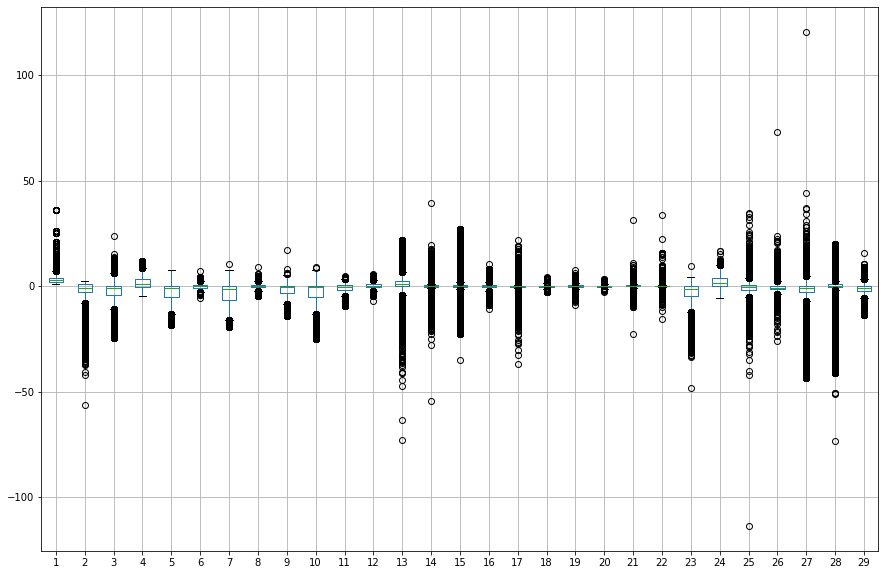

In [ ]:
Sm = SMOTE(random_state=1)
X_tr_smote,y_tr_smote = Sm.fit_resample(X_train,y_train)
pd.DataFrame(X_tr_smote).loc[:,1:].boxplot(figsize = (15,10))

## `Lets check the spread of the data after applying ADASYN`

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


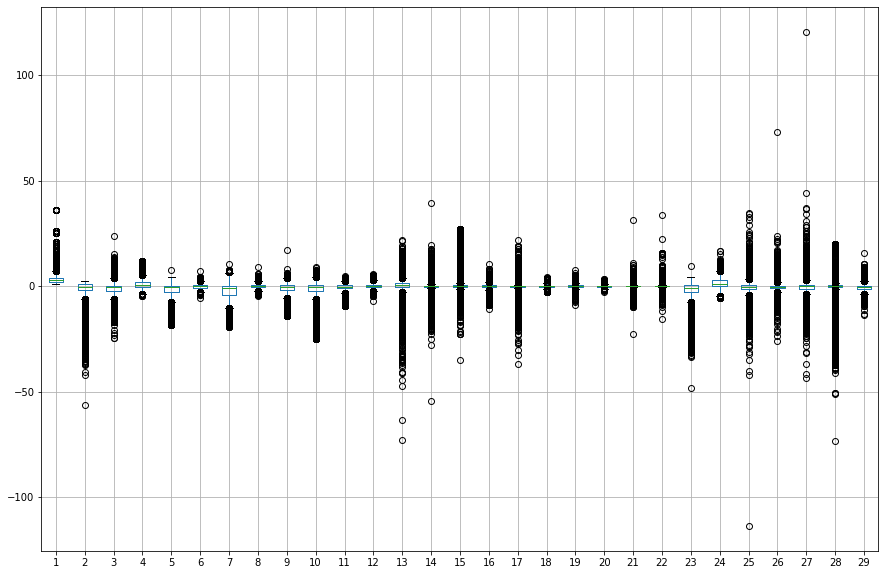

In [ ]:
am = ADASYN(random_state = 1)
adasyn_train_X , adasyn_train_y= am.fit_resample(X_train,y_train)
pd.DataFrame(adasyn_train_X).loc[:,1:].boxplot(figsize = (15,10))


# `MODEL 1 - DECISION TREE - SMOTE`

In [ ]:
param_grid = {
    'max_depth': range(2,20,2),
    'min_samples_leaf': range(2, 1000, 50),
    'min_samples_split': range(2, 1000, 50),
    'criterion': ["entropy", "gini"]
}
new_params = {'decisiontreeclassifier__' + key: param_grid[key] for key in param_grid}
imba_pipeline_dt = make_pipeline(SMOTE(random_state=1), 
                              DecisionTreeClassifier(random_state=1))
cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
grid_imba_dt = RandomizedSearchCV(imba_pipeline_dt, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)

grid_imba_dt.fit(X_train, y_train)

In [ ]:
grid_imba_dt.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 1202,
 'decisiontreeclassifier__min_samples_split': 2702}

In [ ]:
smote_dt = make_pipeline(SMOTE(random_state=1), 
                              DecisionTreeClassifier(random_state=1,criterion= 'entropy',
                              max_depth = 4, min_samples_leaf = 1202,
                              min_samples_split = 2702))
smote_dt.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=1, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1202,
                                        min_samples_split=2702,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
     

### Predictions on the train set

In [ ]:
s_dt_train_pred = smote_dt.predict(X_train)

### Classification report at defaultt threshold (0.5)

In [ ]:
pd.DataFrame(classification_report(y_train,s_dt_train_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999813,0.065424,0.977749,0.532619,0.998199
recall,0.977893,0.894309,0.977749,0.936101,0.977749
f1-score,0.988732,0.121929,0.977749,0.555330,0.987234
support,213236.000000,369.000000,0.977749,213605.000000,213605.000000


# `MODEL 2 - RANDOM FOREST - SMOTE`

In [ ]:
param_grid = {
    'max_depth': [5,10,15],
    'min_samples_leaf': range(500, 1510, 500),
    'min_samples_split': range(500, 1510, 500),
    'max_features': [4,8,15]}

In [ ]:
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
imba_pipeline = make_pipeline(SMOTE(random_state=1), 
                              RandomForestClassifier(random_state=1,n_jobs = -1))
cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
grid_imba = RandomizedSearchCV(imba_pipeline,, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)

grid_imba.fit(X_train, y_train)

In [ ]:
grid_imba.best_params_

In [71]:
smote_rf = make_pipeline(SMOTE(random_state=1), 
                              RandomForestClassifier(random_state=1,n_jobs = -1,criterion= 'entropy',
                              max_depth = 7, max_features = 16, min_samples_leaf = 3502,
                              min_samples_split = 1502, n_estimators = 250))
smote_rf.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        max_features=16, min_samples_leaf=3502,
                                        min_samples_split=1502,
                                        n_estimators=250, n_jobs=-1,
                                        random_state=1))])

### Predictions on the train -set

In [72]:
s_rf_train_pred = smote_rf.predict(X_train)

### Classification report at defaultt threshold (0.5)

In [73]:
pd.DataFrame(classification_report(y_train,s_rf_train_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999848,0.098972,0.985487,0.549410,0.998292
recall,0.985612,0.913279,0.985487,0.949446,0.985487
f1-score,0.992679,0.178590,0.985487,0.585635,0.991273
support,213236.000000,369.000000,0.985487,213605.000000,213605.000000


In [74]:
pd.DataFrame(classification_report(y_test,s_rf_test_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,0.999843,0.100000,0.985689,0.549922,0.998289
recall,0.985819,0.910569,0.985689,0.948194,0.985689
f1-score,0.992781,0.180209,0.985689,0.586495,0.991378
support,71079.000000,123.000000,0.985689,71202.000000,71202.000000


In [75]:
print(roc_auc_score(y_train,smote_rf.predict_proba(X_train)[:,1]))

0.9918431788568575


# `MODEL 3 - XGBOOST - SMOTE`

In [ ]:
param_grid = {'learning_rate': [0.01,0.05,0.1,0.15,0.1],
              'max_depth' : [3,5,7,10,20,40,45],
              'min_child_weight' : [1,3,5,7],
              'gamma':[0.01,0.1,0.2,0.3,0.5],
              'colsample_bytree' : [0.3,0.4,0.5,0.7],
              'subsample': [0.2, 0.4, 0.5],
              "reg_alpha": [0,0.5, 1],
              "reg_lambda": [1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5, 7],
              'n_estimators': [100,200,300,500]}

In [ ]:
new_params = {'xgbclassifier__' + key: param_grid[key] for key in param_grid}
imba_pipeline_xgb = make_pipeline(SMOTE(random_state=1), 
                              XGBClassifier(random_state=1,n_jobs = -1,early_stopping_rounds= 10))
cv = StratifiedShuffleSplit(n_splits= 3,random_state = 1 )
grid_imba_xgb = RandomizedSearchCV(imba_pipeline_xgb, , param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)

grid_imba_xgb.fit(X_train.values, y_train.values)

In [ ]:
grid_imba_xgb.best_params_

In [83]:
smote_xgb = make_pipeline(SMOTE(random_state=1), 
                              XGBClassifier(colsample_bytree= 0.4,gamma = 0.1,learning_rate = 0.05,max_depth = 10,
                                            min_child_weight = 1,n_estimators = 200,reg_alpha = 0.5,reg_lambda = 0.05,
                                            subsample = 0.4))
smote_xgb.fit(X_train.values,y_train.values)

Pipeline(steps=[('smote', SMOTE(random_state=1)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.4, gamma=0.1,
                               learning_rate=0.05, max_depth=10,
                               n_estimators=200, reg_alpha=0.5, reg_lambda=0.05,
                               subsample=0.4))])

### Predictions on the train-set

In [84]:
s_xgb_train_pred = smote_xgb.predict(X_train.values)

### Classification report at default threshold (0.5)

In [85]:
pd.DataFrame(classification_report(y_train,s_xgb_train_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.946154,0.999902,0.973077,0.999907
recall,0.999902,1.000000,0.999902,0.999951,0.999902
f1-score,0.999951,0.972332,0.999902,0.986141,0.999903
support,213236.000000,369.000000,0.999902,213605.000000,213605.000000


### auc-roc

In [86]:
print(roc_auc_score(y_train,smote_xgb.predict_proba(X_train.values)[:,1]))

0.9999949036707347


# `MODEL 4 - LGBM - SMOTE`

In [ ]:
param_grid = {'learning_rate': [0.1,0.2,0.4,0.5,0.7,1,1.5],
              'max_depth' : [3,5,7,10,12,15],
              'min_child_weight' : [1,3,5,7,9],
              'gamma':[0.01,0.1,0.2,0.3,0.5],
              'colsample_bytree' : [0.1,0.2,0.3,0.4],
              'subsample': [0.3, 0.4,0.6,0.8],
              "reg_alpha": [1,2,3,4,5],
              "reg_lambda": [1,2,3,4,5],
              "min_child_weight": [1,3,5,6,7],
              'n_estimators': [200,300,500,600]}

In [ ]:
new_params = {'lgbmclassifier__' + key: param_grid[key] for key in param_grid}
imba_pipeline_lgbm = make_pipeline(ADASYN(random_state=1,sampling_strategy = 'minority'), 
                              LGBMClassifier(random_state=1,n_jobs = -1))
cv = StratifiedShuffleSplit(n_splits= 3 ,random_state = 1)
grid_imba_lgbm = RandomizedSearchCV(imba_pipeline_lgbm, param_distributions= param_grid, 
                    cv= cv, 
                       scoring= scores, refit = 'roc_auc', n_jobs= -1 , return_train_score= True,random_state = 1)

grid_imba_lgbm.fit(X_train.values, y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=None, test_size=None,
            train_size=None),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=1, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('lgbmc...
                                        'lgbmclassifier__max_depth': [3, 5, 7,
        

In [ ]:
grid_imba_lgbm.best_params_

{'lgbmclassifier__colsample_bytree': 0.3,
 'lgbmclassifier__gamma': 0.01,
 'lgbmclassifier__learning_rate': 0.5,
 'lgbmclassifier__max_depth': 12,
 'lgbmclassifier__min_child_weight': 3,
 'lgbmclassifier__n_estimators': 600,
 'lgbmclassifier__reg_alpha': 1,
 'lgbmclassifier__reg_lambda': 5,
 'lgbmclassifier__subsample': 0.4}

In [ ]:
smote_lgbm = make_pipeline(SMOTE(random_state=1), 
                              LGBMClassifier(colsample_bytree= 0.3,gamma = 0.01,learning_rate = 0.5,max_depth = 12,
                                            min_child_weight = 3,n_estimators = 600,reg_alpha =1,reg_lambda = 5,
                                            subsample = 0.4))
smote_lgbm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=1, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=0.3, gamma=0.01,
                                importance_type='split', learning_rate=0.5,
                                max_depth=12, min_child_samples=20,
                                min_child_weight=3, min_split_gain=0.0,
                                n_estimators=600, n_jobs=-1, num_leaves=31,
                                objective=None, random_state=None, reg_alpha=1,
                                reg_lambda=5, silent=True, subsample=0.4,
                                subsample_for_bin=200000, subsa

### predictions on the train-set

In [ ]:
s_lgbm_train_pred = smote_lgbm.predict(X_train.values)

### Classification report at default threshold (0.5)

In [ ]:
pd.DataFrame(classification_report(y_train,s_lgbm_train_pred, output_dict= True ))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,213236.0,369.0,1.0,213605.0,213605.0


# `Choosing the best model`

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
classifiers = [dt_entrophy,rf1,xgb_model,lgbm_model]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','train_auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# `ROC CURVE OF ALL FOUR MODELS - USING CLASS WEIGHTS`

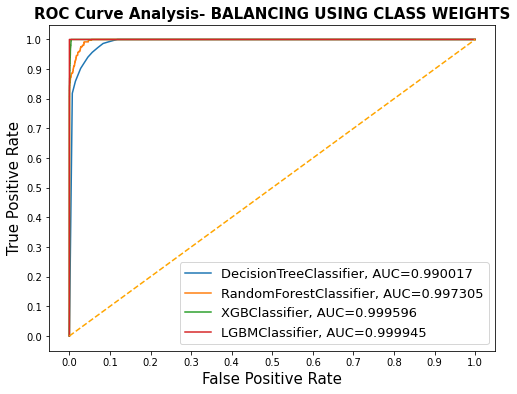

In [ ]:
fig = plt.figure(figsize=(8,6))


for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.6f}".format(i, result_table.loc[i]['train_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis- BALANCING USING CLASS WEIGHTS', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')



## The below dataframe shows 4 things:
## a) Avg_diff_recall: The difference between the mean recall score of train and validation set (at threshold 0.5)
## b) Avg_diff_f1 (at threshold 0.5): The difference between the mean f1 score of train and validation set 
## c) Avg_auc_diff : The difference between the mean auc score of train and validation set
## d) Avg_std_val_recall : The STANDARD DEVIATION OF THE CROSS VALIDATION RECALL WHICH WILL TELL YOU IF THE MODEL IS A HIGH VARIANCE MODEL

In [ ]:
result_frame_1 = pd.DataFrame(columns = ['Avg_Diff_recall','Avg_Diff_f1','Avg_Auc_diff','Avg_Std_Val_recall'])

for clf in classifiers:
    temp = cross_validate(clf,X = X_train.values, y = y_train.values,cv = cv , n_jobs = -1,return_train_score= True,scoring = scores)
    diff_recall = abs(temp['train_recall'].mean() - temp['test_recall'].mean())
    diff_f1 = abs(temp['train_f1'].mean() - temp['test_f1'].mean())
    auc_diff = abs(temp['train_roc_auc'].mean() - temp['test_roc_auc'].mean())
    val_std = temp['test_recall'].std()
    result_frame_1.loc[clf.__class__.__name__,:] = [diff_recall,diff_f1,auc_diff,val_std]

result_frame_1

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,Avg_Diff_recall,Avg_Diff_f1,Avg_Auc_diff,Avg_Std_Val_recall
DecisionTreeClassifier,0.0759525,0.00231098,0.0390331,0.0337086
RandomForestClassifier,0.0338109,0.00707522,0.0264392,0.0220675
XGBClassifier,0.0376913,0.040685,0.0306903,0.0674173
LGBMClassifier,0.324324,0.278417,0.0579239,0.0583851


In [ ]:
classifiers_2 = [smote_dt,smote_rf,smote_xgb,smote_lgbm]


# Define a result table as a DataFrame
result_table_2 = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_2:
    yproba = cls.predict_proba(X_train.values)[::,1]
    
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    
    result_table_2 = result_table_2.append({'classifiers':'Smote_' + list(cls.named_steps.keys())[1],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table_2.set_index('classifiers', inplace=True)


# ROC CURVE OF ALL FOUR MODELS - USING SMOTE

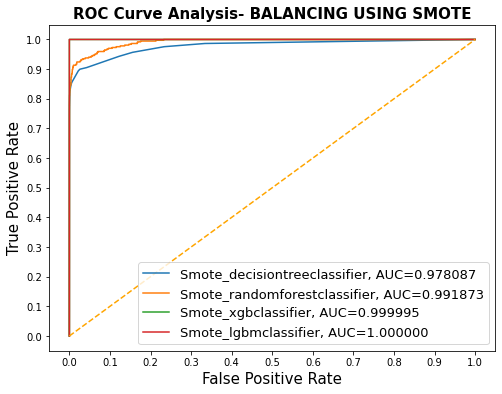

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table_2.index:
    plt.plot(result_table_2.loc[i]['fpr'], 
             result_table_2.loc[i]['tpr'], 
             label="{}, AUC={:.6f}".format(i, result_table_2.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis- BALANCING USING SMOTE', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
result_frame_2 = pd.DataFrame(columns = ['Avg_Diff_recall','Avg_Diff_f1','Avg_Auc_diff','Avg_Std_Val_recall'])

for clf in classifiers_2:
    temp = cross_validate(clf,X = X_train.values, y = y_train.values,cv = cv , n_jobs = -1,return_train_score= True,scoring = scores)
    diff_recall = abs(temp['train_recall'].mean() - temp['test_recall'].mean())
    diff_f1 = abs(temp['train_f1'].mean() - temp['test_f1'].mean())
    auc_diff = abs(temp['train_roc_auc'].mean() - temp['test_roc_auc'].mean())
    val_std = temp['test_recall'].std()
    result_frame_2.loc[list(clf.named_steps.keys())[1],:] = [diff_recall,diff_f1,auc_diff,val_std]

result_frame_2

,Avg_Diff_recall,Avg_Diff_f1,Avg_Auc_diff,Avg_Std_Val_recall
decisiontreeclassifier,0.00871052,0.00368946,0.0103489,0.0220675
randomforestclassifier,0.0177738,0.00224607,0.0174409,0.0127407
xgbclassifier,0.153153,0.117282,0.0275357,0.0459371
lgbmclassifier,0.162162,0.142405,0.0317373,0.044135


## `Based on the following factors Random Forest built using class_weight technique is selected as the final model for reporting`
#### a) Low standard deviation of validation recall
#### b) Lowest auc difference for train and validation set compared to other models. Which tells us that the model may have achieved a good balance of bias and variance
#### c) Xgboost and Lightgbm whose recall seem to fluctuate a lot with unseen dataset and also the difference between train and validation auc is huge for these models. This is not the case with Random Forest
#### d) A very good AUC of 99.73 on train data
#### e) This model may output good results on unseen data as the comparision of train and validation metrics indicate that the results are very close. But,there may be uncertainity in predictions when Xgboost is used on unseen data. The results may not be stable


## `Probability prediction of RANDOM FOREST USING CLASS WEIGHT MODEL`

In [241]:
rf_t_pred = pd.Series(rf1.predict_proba(X_train)[:,1])

### For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So consider the losses if the missed transaction was a high-value fraudulent one, for e.g., a transaction of DOLLAR 10,000?

## `So here, to save banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.`

## `Also , the optimum threshold point is where TPR is highest and FPR is the lowest. TPR is nothing but Sensitivity and (1-FPR) is nothing but Specificity. SO, the optimum point is where the two curves meet in THE SENSITIVITY AND SPECIFICITY TRADEOFF CURVE`

In [242]:
numbers = [float(x)/10 for x in range(10)] 
cut = pd.DataFrame()# 0.1 to 0.10
for i in numbers:
    cut[i]= rf_t_pred.map(lambda x: 1 if x > i else 0)
cut

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
213600,1,0,0,0,0,0,0,0,0,0
213601,1,1,1,0,0,0,0,0,0,0
213602,1,0,0,0,0,0,0,0,0,0
213603,1,0,0,0,0,0,0,0,0,0


In [243]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = confusion_matrix(y_train, cut[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.020622,1.000000,0.018927
0.1,0.1,0.726622,1.000000,0.726148
0.2,0.2,0.886192,1.000000,0.885995
0.3,0.3,0.948508,0.997290,0.948423
0.4,0.4,0.975174,0.962060,0.975196
0.5,0.5,0.987425,0.915989,0.987549
0.6,0.6,0.994209,0.883469,0.994401
0.7,0.7,0.998418,0.853659,0.998668
0.8,0.8,0.999237,0.823848,0.999540
0.9,0.9,0.999363,0.756098,0.999784


### Choosing the best cut-off value using SENSITIVITY AND SPECIFICITY TRADEOFF

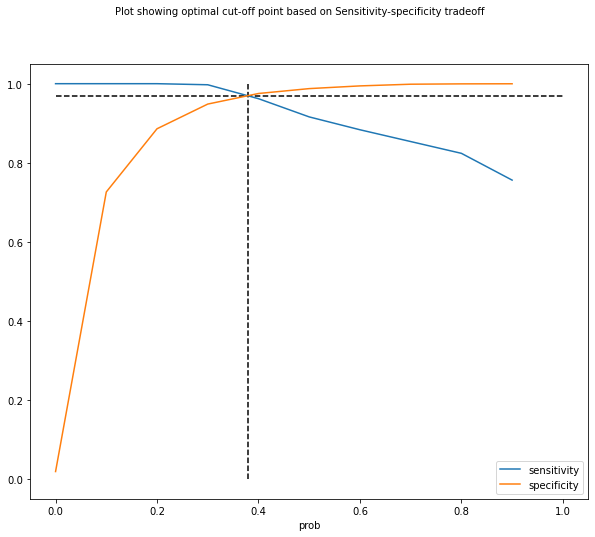

In [244]:
cutoff_df.plot.line(x='prob', y=['sensitivity','specificity'], figsize = (10,8))
plt.vlines(x=0.38, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.97,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing optimal cut-off point based on Sensitivity-specificity tradeoff' , size = 10 )
plt.subplots_adjust(hspace= 0.5)

### So, we can see that 0.38 is the optimum cutoff point. Lets use this and make predictions on the train data

In [245]:
final_train_pred = rf_t_pred.map(lambda x: 1 if x > 0.38 else 0)

In [246]:
confusion_train = confusion_matrix(y_train, final_train_pred )

In [247]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0]

### Resultts on the train-data

In [276]:
print('TRUE POSITIVE RATE OF THE TRAIN IS '+  str(round((TP_train / float(TP_train+FN_train)),2)))
print('FALSE POSITIVE RATE OF THE TRAIN IS '+  str(round(1 -(TN_train / float(TN_train+FP_train)),2)))

TRUE POSITIVE RATE OF THE TRAIN IS 0.96
FALSE POSITIVE RATE OF THE TRAIN IS 0.03


### Predictions on the test data

In [250]:
test_pred = pd.Series(rf1.predict_proba(X_test.values)[:,1]).map(lambda x:1 if x > 0.38 else 0)

In [251]:
confusion_test= confusion_matrix(y_test,  test_pred)

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0]

### Results on the test data

In [275]:
print('TRUE POSITIVE RATE TEST IS '+  str(round((TP_test / float(TP_test+FN_test)),2)))
print('FALSE POSITIVE RATE TEST IS '+  str(round(1 -(TN_test / float(TN_test+FP_test)),2)))

TRUE POSITIVE RATE TEST IS 0.92
FALSE POSITIVE RATE TEST IS 0.03


# `So, we can verify that our model is generalizing well on the unseen data.` 

### Lets check the feature importance of our model

<AxesSubplot:>

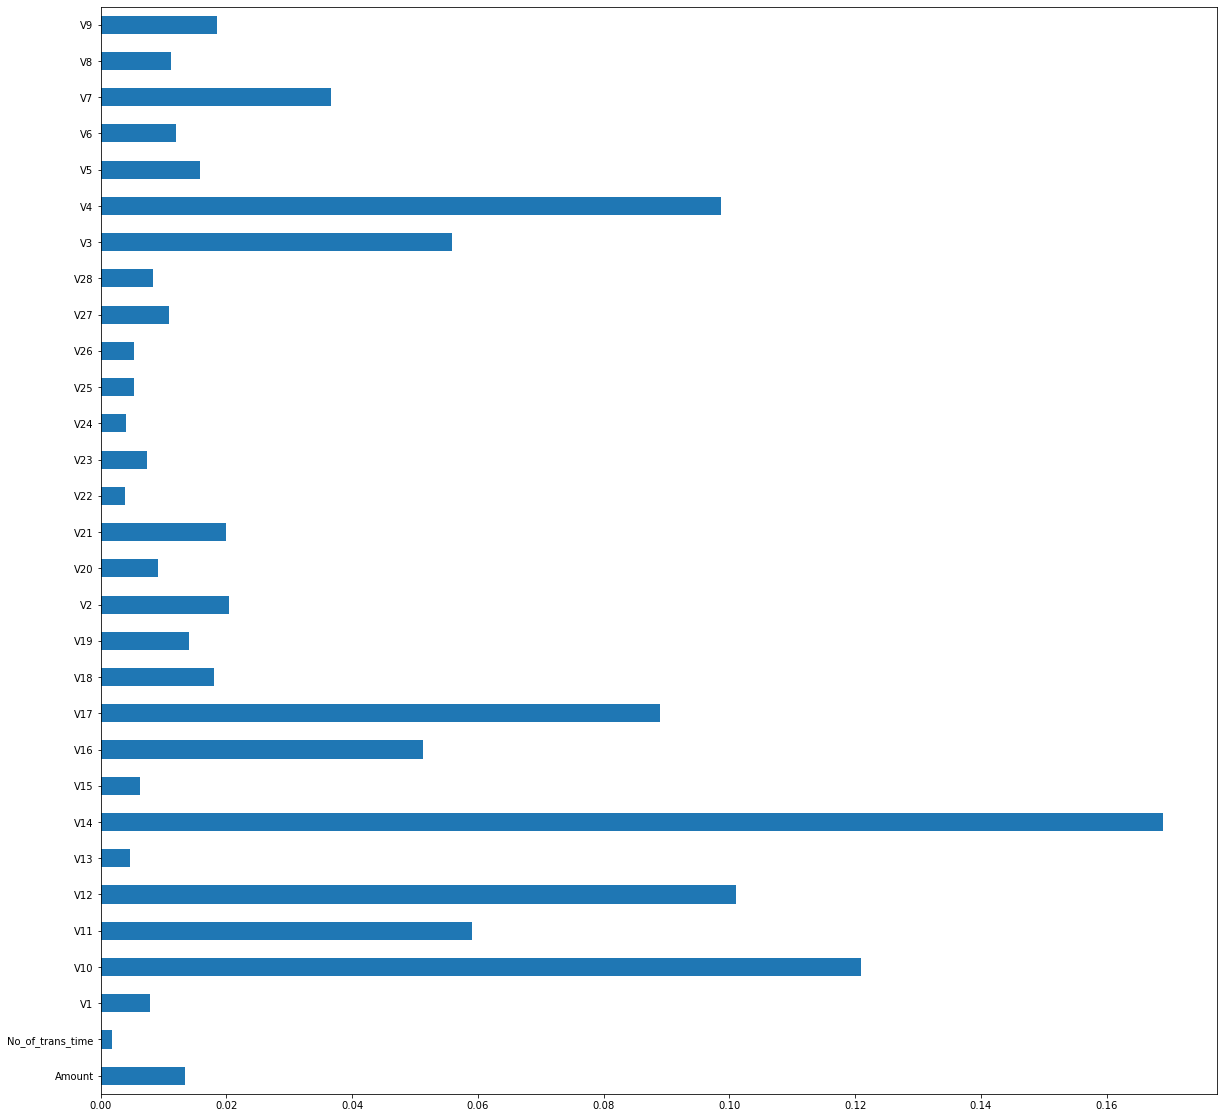

In [283]:
pd.Series(rf1.feature_importances_,index = X_train.columns).plot(kind = 'barh')